In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)


print(len(X_train))
print(len(X_test))

7500
2500


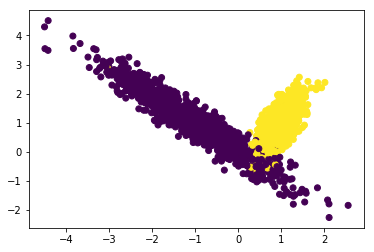

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

In [126]:
# Reference - https://www.geeksforgeeks.org/random-seed-in-python/
# Reference - Some use of code from Assignment - 4(Reference) which made Custom GridSearchCV 

def RandomSearchCV(X_train,y_train,classifier, folds, param_range):
    train_score = []
    cv_scores = []
    
    for k in tqdm(param_range['n_neighbors']):
        all_train = []
        all_cv = []


        for i in range(0,folds):
        
            # Here we are taking length of each fold and then we are going to find indices of train and cv so that we can take out 
            # those indices from X_train data
            # for eg, folds = 5 so length of each fold is len(X_train) i.e 7500 in this dataset divide by 5 i.e folds so we get 
            # length of each fold as 1500 as we are taking equally distributed data.
            length_of_each_fold = int(len(X_train)/folds)
            
            
            # Here it will take indices for CV points(test_indices) in the first run(i = 0) from 0-1500, then for i = 1 it will give indices 
            # from 1500-3000 and for i = 2 from 3000-4500 like that and it depends on number of folds entered. 
            test_indices = list(set(list(range((length_of_each_fold*i),(length_of_each_fold*(i+1))))))
            
            # Here we are getting the new train data as "Original X_train i.e has len 7500" we subtract new cv indices from it and 
            # we get eg, for folds = 5(len(X_train)i.e 7500 - len(test_indices)i.e 1500 so we get 6000 as our new train set for 
            # the number of folds entered 
            train_indices = list(set(list(range(0,len(X_train))))- set(test_indices))
            
            
            # Here we are taking values of the indices calculated above
            new_x_train = X_train[train_indices]
            new_y_train = y_train[train_indices]
            new_x_test = X_train[test_indices]
            new_y_test = y_train[test_indices]


            classifier.n_neighbors = k
            classifier.fit(new_x_train,new_y_train)

            Y_predicted = classifier.predict(new_x_test)
            all_cv.append(accuracy_score(new_y_test, Y_predicted))

            Y_predicted = classifier.predict(new_x_train)
            all_train.append(accuracy_score(new_y_train, Y_predicted))

        train_score.append(np.mean(np.array(all_train)))
        cv_scores.append(np.mean(np.array(all_cv)))

    return train_score,cv_scores
 




Enter the number of folds: 3


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.43it/s]


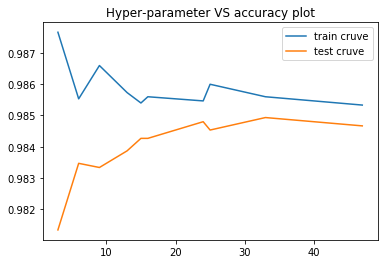

In [129]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")


neigh = KNeighborsClassifier()

random.seed(8)

sorted_samplerange = sorted(random.sample(range(1, 51), 10))

param_range = {'n_neighbors':sorted_samplerange}

folds = int(input("Enter the number of folds: "))

train_score,cv_scores = RandomSearchCV(X_train, y_train, neigh, folds,param_range)
 

plt.plot(param_range['n_neighbors'],train_score, label='train cruve')
plt.plot(param_range['n_neighbors'],cv_scores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

# From this Graph I got the best approximate K as 24 so taking 24 as K in K-NN and plotting the final graph in last code block.
# Any final K can be taken after entering different number of fold as it all depend on range of paramters taken in RandomSearchCV and folds.
# Used random.seed function in this code to keep values of sample 'n_neighbors' constant after 1st time generation
# Here used input for asking user to enter the number of folds.

In [6]:
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#1f77b4', '#ff7f0e', '#2ca02c'])
    cmap_bold = ListedColormap(['#e377c2', '#7f7f7f', '#bcbd22'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()
    
# Took this code as reference from GridSearch

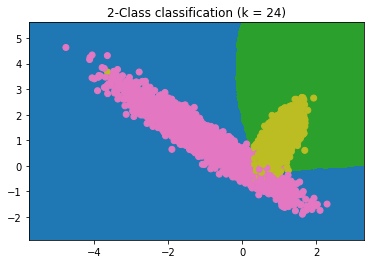

In [125]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 24)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)

# Final Plot of the data used
# Played around with colors
# Reference - https://matplotlib.org/stable/api/colors_api.html#module-matplotlib.colors